# Simple Data Cleaning and Exploration

Dataset was provided as part of a recruitment drive by a Tech Consulting Company.
The dataset seems to have already been partially used in some analysis as evidenced
by the 'rpart','Adjusted Prob for 50% Cut-off (without Formulae)' and 'NPS' columns.
NPS seems to have been preprocessed to 1 (for scores 9-10), 0(for scores 7-8) and 
-1(for scores 0-6). The other two columns point to Recursive Partitioning to be the 
choice of classification.

In this python file, I perform some simple data imputing on missing values in addition to 
data cleaning for later processing by Logit Regression.

# Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import statsmodels.api as sm

# Import Data

In [2]:
#Import and display Churn data

raw_data = pd.read_csv('ChurnData.csv')
raw_data

,Customer ID,Churned,Age,Average Bill over 6 months,Average Bill over 12 months,Number of defaults in last 12 bills,Payment Method,District,Area,Concesssion Card,...,rpart,Category of latest complaint,NPS,Product,Multiple Products,Product_New,Adjusted Prob for 50% Cut-off (without Formulae),Customer Segment,Product Category,Bill Amount
0,1,Yes,64.0,6.0000,123.0150,2,Credit Card,N,Northern Territory,No,...,0.357143,Network Coverage,-1,Internet Service,Yes,Mobile & Internet Service,0.838283,Independents,Internet,169
1,2,No,29.0,18.0000,26.4125,3,Cheque,S,South Australia,No,...,0.053805,Call Drop,0,Fixed Line,No,Fixed Line,0.346654,Small Business,ADSL,137
2,3,No,47.0,4.0000,108.9525,0,Cheque,Q,Queensland,No,...,0.030710,Data Charges,0,Mobile,No,Internet Service,0.228171,Independents,Fixed line,252
3,4,No,75.0,7.0000,106.0475,1,Cheque,S,South Australia,Yes,...,0.030710,High Billed Amount,0,Internet Service,Yes,"Internet Service,Fixed Line & PayTV",0.228171,"Friends, Fun & Fashion",Internet,175
4,5,No,66.0,35.4075,32.4475,1,Cheque,V,Victoria,No,...,0.144033,Call Drop,0,Fixed Line,No,Internet Service,0.610902,"Friends, Fun & Fashion",Internet,128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18360,18361,No,88.0,36.1375,26.7650,0,Cheque,V,Victoria,Yes,...,0.030710,High Billed Amount,1,Mobile,No,Fixed Line,0.228171,Family & Self Development,Fixed line,55
18361,18362,No,72.0,39.8950,31.8450,0,Cheque,V,Victoria,No,...,0.030710,High Billed Amount,1,Mobile,Yes,Mobile & PayTV,0.228171,"Friends, Fun & Fashion",Fixed line,79
18362,18363,No,19.0,19.0000,43.6925,0,Cheque,V,Victoria,No,...,0.114994,Call Drop,1,Mobile,No,Fixed Line,0.547997,Independents,Mobile,81
18363,18364,No,32.0,28.1175,21.8450,6,Cheque,V,Victoria,No,...,0.053805,Data Charges,-1,Mobile,Yes,Mobile & Internet Service,0.346654,Small Business,Mobile,163


In [3]:
#copy the data frame to another variable on which further modifications will be done

data = raw_data.copy()

# Data Exploration

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18365 entries, 0 to 18364
Data columns (total 26 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Customer ID                                       18365 non-null  int64  
 1   Churned                                           18365 non-null  object 
 2   Age                                               17366 non-null  float64
 3   Average Bill over 6 months                        18365 non-null  float64
 4   Average Bill over 12 months                       18365 non-null  float64
 5   Number of defaults in last 12 bills               18365 non-null  int64  
 6   Payment Method                                    18365 non-null  object 
 7   District                                          18365 non-null  object 
 8   Area                                              18365 non-null  object 
 9   Concesssion Card 

# Column Info:

Churned : Information on whether a customer has quit or not. (Yes/No)

Age : just a number

Average Bill over 6/12 months : Spending of customers. A number

Number of defaults in last 12 bills : Representative of timely bill payments.

Payment Method : Preferred Payment Method. (Cheque/Credit Card/Direct Debit)

District/Area : Location of Customer.

Concession Card : Does customer use one? (Yes/No)

Inbound/Outbound Calls : Number of calls customer made/made to customer. 

Relationship (months) : Time customer has been using services.

Occupier Status : 

Multiple Fuel :

Bill Delivery Method : How bills were sent to customers. (Mail/Internet/Email)

Category of Latest Complaint : Latest Recorded Complaint. 
(Call Drop/High Billed Amount/Internet Slowness/Data Charges/Network Coverage)        

NPS : Pre-Cleaned/Converted to Categorical. 

Product/Multiple Products : Type of products used/Multiple types of products being used.
(Mobile, Fixed Line, Internet Service)/(Yes/No)

Product_New: (Mobile/Fixed Line/Internet Service)       

Customer Segment: (Independents/Family & Self Development/Friends, Fun & Fashion/Principled Professional      
/Small Business/Entrepreneur)               

Product Category:

Bill Amount:       

In [5]:
#check number of null values in each column. Since number of rows is greater than 5% of all records,
#we will not outright drop them.

data.isnull().sum()


#Since the total number of columns that would be dropped would be greater than 5% of the total,
#they won't be outright dropped with .dropna()
# Age : 999
# Relationship(months) : 816
# Occupier Status : 2
# Multiple Fuel : 2

Customer ID                                           0
Churned                                               0
Age                                                 999
Average Bill over 6 months                            0
Average Bill over 12 months                           0
Number of defaults in last 12 bills                   0
Payment Method                                        0
District                                              0
Area                                                  0
Concesssion Card                                      0
INBOUNDCALLS                                          0
OUTBOUNDCALLS                                         0
Relationship (months)                               816
Occupier Status                                       2
Multiple Fuel                                         2
Bill Delivery Method                                  0
rpart                                                 0
Category of latest complaint                    

In [6]:
## List of all columns

data.columns

Index(['Customer ID', 'Churned', 'Age', 'Average Bill over 6 months',
       'Average Bill over 12 months', 'Number of defaults in last 12 bills',
       'Payment Method', 'District', 'Area', 'Concesssion Card',
       'INBOUNDCALLS', 'OUTBOUNDCALLS', 'Relationship (months)',
       'Occupier Status', 'Multiple Fuel', 'Bill Delivery Method', 'rpart',
       'Category of latest complaint', 'NPS', 'Product', 'Multiple Products',
       'Product_New', 'Adjusted Prob for 50% Cut-off (without Formulae)',
       'Customer Segment', 'Product Category', 'Bill Amount'],
      dtype='object')

### Age

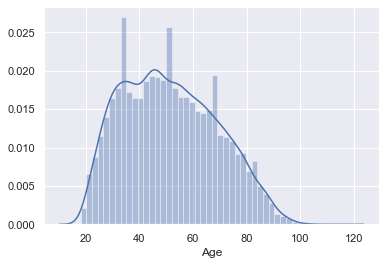

In [7]:
#Distplot to see distribution of age values.
#Distplot shows highest density of ages between the 40 to 60 mark

sns.distplot(data['Age'])

In [8]:
data['Age'].value_counts()

45.0     376
54.0     370
43.0     362
46.0     357
47.0     355
        ... 
99.0       3
100.0      2
101.0      1
116.0      1
103.0      1
Name: Age, Length: 87, dtype: int64

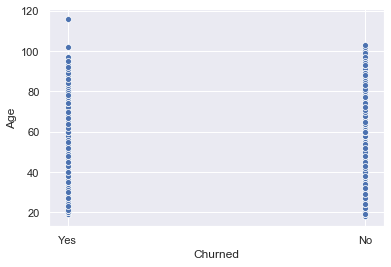

In [9]:
sns.scatterplot(y = data['Age'],x = data['Churned'])

### Average Bill over 6 months

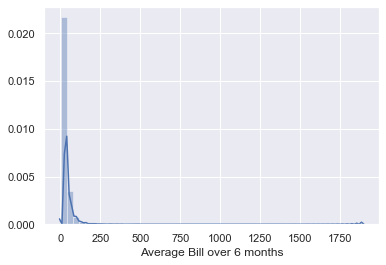

In [10]:
sns.distplot(data['Average Bill over 6 months'],norm_hist=False)

In [11]:
data['Average Bill over 6 months'].value_counts()

3.0000     490
6.0000     485
16.0000    473
11.0000    469
18.0000    466
          ... 
17.7500      1
12.8300      1
20.8350      1
40.7975      1
27.1775      1
Name: Average Bill over 6 months, Length: 8390, dtype: int64

In [12]:
pd.crosstab(data['Age'],data['Average Bill over 6 months'])

Average Bill over 6 months,1.1475,1.1875,1.4675,1.5500,1.8325,1.9525,2.0650,2.0700,2.1475,2.2300,...,480.2700,481.7025,519.2825,573.2100,585.9000,650.8125,709.9975,766.4550,838.5225,950.5000
Age,,,,,,,,,,,,,,,,,,,,,
18.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
101.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
102.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Average Bill over 12 months
       

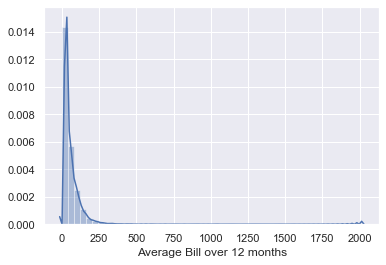

In [11]:
sns.distplot(data['Average Bill over 12 months'],norm_hist=False)

### 'Number of defaults in last 12 bills'

In [12]:
data['Number of defaults in last 12 bills'].value_counts()

0     6450
1     4012
2     2549
3     1721
4     1331
5      687
6      436
7      301
8      225
12     211
9      188
11     138
10     116
Name: Number of defaults in last 12 bills, dtype: int64

### Payment Method

In [13]:
data['Payment Method'].value_counts()

Cheque          14765
Credit Card      2139
Direct Debit     1461
Name: Payment Method, dtype: int64

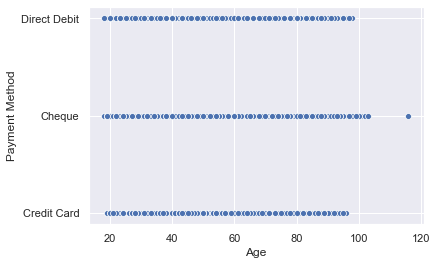

In [34]:
sns.scatterplot(y = data['Payment Method'],x = data['Age'])

### District

In [14]:
data['District'].value_counts()

V    11750
Q     2855
S     2204
N     1556
Name: District, dtype: int64

### Area

In [15]:
# Area and District seem ot be the same
data['Area'].value_counts()

Victoria              11750
Queensland             2855
South Australia        2204
Northern Territory     1556
Name: Area, dtype: int64

### Concession Card

In [16]:
data['Concesssion Card'].value_counts()

No     13615
Yes     4750
Name: Concesssion Card, dtype: int64

### Inbound Calls

In [17]:
data['INBOUNDCALLS'].value_counts()

0     17323
1       644
2       181
3        67
4        42
5        29
6        20
7        18
8         9
10        7
9         6
11        4
50        2
14        2
15        2
24        1
30        1
22        1
26        1
12        1
19        1
28        1
44        1
32        1
Name: INBOUNDCALLS, dtype: int64

### Outbound Calls

In [18]:
data['OUTBOUNDCALLS'].value_counts()

0    17766
1      380
2      128
3       54
4       19
5        9
6        4
9        2
7        2
8        1
Name: OUTBOUNDCALLS, dtype: int64

### Relationship (months)

In [19]:
data['Relationship (months)'].value_counts()

5.0      392
4.0      385
1.0      346
11.0     345
2.0      339
        ... 
146.0      5
139.0      4
143.0      3
148.0      3
147.0      2
Name: Relationship (months), Length: 148, dtype: int64

### Occupier Status

In [20]:
data['Occupier Status'].value_counts()

Regular     18035
Occupier      328
Name: Occupier Status, dtype: int64

### Multiple Fuel

In [21]:
data['Multiple Fuel'].value_counts()

N    10716
Y     7647
Name: Multiple Fuel, dtype: int64

### Bill Delivery Method

In [22]:
data['Bill Delivery Method'].value_counts()

Mail        12842
Internet     5341
Email         182
Name: Bill Delivery Method, dtype: int64

### Catrgory of Latest Complaint

In [23]:
data['Category of latest complaint'].value_counts()

Call Drop             7693
High Billed Amount    5994
Internet Slowness     4377
Data Charges           272
Network Coverage        29
Name: Category of latest complaint, dtype: int64

### NPS

In [24]:
data['NPS'].value_counts()

 1    11466
-1     5048
 0     1851
Name: NPS, dtype: int64

### Product

In [25]:
data['Product'].value_counts()

Mobile              18357
Fixed Line              6
Internet Service        2
Name: Product, dtype: int64

### Multiple Products

In [26]:
data['Multiple Products'].value_counts()

Yes    11118
No      7247
Name: Multiple Products, dtype: int64

### Product_New

In [27]:
data['Product'].value_counts()

Mobile              18357
Fixed Line              6
Internet Service        2
Name: Product, dtype: int64

### Customer Segment

In [28]:
data['Customer Segment'].value_counts()

Independents                 5740
Family & Self Development    2691
Friends, Fun & Fashion       2614
Principled Professional      2567
Small Business               2399
Entrepreneur                 2354
Name: Customer Segment, dtype: int64

### Product Category

In [28]:
data['Product Category'].value_counts()

Fixed line    3538
Mobile        3314
Internet      3039
Bundle        2979
ADSL          2748
Cable         2747
Name: Product Category, dtype: int64

### Bill Amount

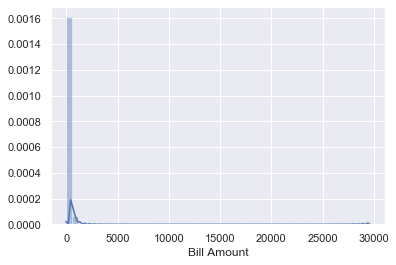

In [29]:
sns.distplot(data['Bill Amount'],norm_hist=False)

In [30]:
'District', 'Area', 'Concesssion Card',
       'INBOUNDCALLS', 'OUTBOUNDCALLS', 'Relationship (months)',
       'Occupier Status', 'Multiple Fuel', 'Bill Delivery Method', 'rpart',
       'Category of latest complaint', 'NPS', 'Product', 'Multiple Products',
       'Product_New', 'Adjusted Prob for 50% Cut-off (without Formulae)',
       'Customer Segment', 'Product Category', 'Bill Amount'],

IndentationError: unexpected indent (<ipython-input-30-0b5b0999b2d0>, line 2)

# Feature Engineering

In [76]:
### List out all columns

data.columns

Index(['Customer ID', 'Churned', 'Age', 'Average Bill over 6 months',
       'Average Bill over 12 months', 'Number of defaults in last 12 bills',
       'Payment Method', 'District', 'Area', 'Concesssion Card',
       'INBOUNDCALLS', 'OUTBOUNDCALLS', 'Relationship (months)',
       'Occupier Status', 'Multiple Fuel', 'Bill Delivery Method', 'rpart',
       'Category of latest complaint', 'NPS', 'Product', 'Multiple Products',
       'Product_New', 'Adjusted Prob for 50% Cut-off (without Formulae)',
       'Customer Segment', 'Product Category', 'Bill Amount'],
      dtype='object')

In [77]:
'Churned'


'Age', 'Average Bill over 12 months', 'Number of defaults in last 12 bills', 'Concesssion Card', 'Relationship (months)'
,'Category of latest complaint','NPS','Multiple Products','Customer Segment','Product Category','Bill Amount'

SyntaxError: EOL while scanning string literal (<ipython-input-77-ef89f62a5e32>, line 5)

In [78]:
data1 = data.copy()
data1

,Customer ID,Churned,Age,Average Bill over 6 months,Average Bill over 12 months,Number of defaults in last 12 bills,Payment Method,District,Area,Concesssion Card,...,rpart,Category of latest complaint,NPS,Product,Multiple Products,Product_New,Adjusted Prob for 50% Cut-off (without Formulae),Customer Segment,Product Category,Bill Amount
0,1,Yes,64.0,6.0000,123.0150,2,Credit Card,N,Northern Territory,No,...,0.357143,Network Coverage,-1,Internet Service,Yes,Mobile & Internet Service,0.838283,Independents,Internet,169
1,2,No,29.0,18.0000,26.4125,3,Cheque,S,South Australia,No,...,0.053805,Call Drop,0,Fixed Line,No,Fixed Line,0.346654,Small Business,ADSL,137
2,3,No,47.0,4.0000,108.9525,0,Cheque,Q,Queensland,No,...,0.030710,Data Charges,0,Mobile,No,Internet Service,0.228171,Independents,Fixed line,252
3,4,No,75.0,7.0000,106.0475,1,Cheque,S,South Australia,Yes,...,0.030710,High Billed Amount,0,Internet Service,Yes,"Internet Service,Fixed Line & PayTV",0.228171,"Friends, Fun & Fashion",Internet,175
4,5,No,66.0,35.4075,32.4475,1,Cheque,V,Victoria,No,...,0.144033,Call Drop,0,Fixed Line,No,Internet Service,0.610902,"Friends, Fun & Fashion",Internet,128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18360,18361,No,88.0,36.1375,26.7650,0,Cheque,V,Victoria,Yes,...,0.030710,High Billed Amount,1,Mobile,No,Fixed Line,0.228171,Family & Self Development,Fixed line,55
18361,18362,No,72.0,39.8950,31.8450,0,Cheque,V,Victoria,No,...,0.030710,High Billed Amount,1,Mobile,Yes,Mobile & PayTV,0.228171,"Friends, Fun & Fashion",Fixed line,79
18362,18363,No,19.0,19.0000,43.6925,0,Cheque,V,Victoria,No,...,0.114994,Call Drop,1,Mobile,No,Fixed Line,0.547997,Independents,Mobile,81
18363,18364,No,32.0,28.1175,21.8450,6,Cheque,V,Victoria,No,...,0.053805,Data Charges,-1,Mobile,Yes,Mobile & Internet Service,0.346654,Small Business,Mobile,163


### Age

In [79]:
#average of ages in the Age column.

data1['Age'].mean()

51.42220430726707

In [80]:
#for sort to work, either store the output in another variable and display that or just inplace = true

#sorted = data.sort_values(by = 'Age', ascending = True)

#sorted

In [81]:
#filling the NA values in Age with the mean value of Age column.
#Could also fill with median values
#data1["Age"].fillna(data1.transform("median"), inplace=True)
values = {'Age' : 51}
data1 = data1.fillna(value = values)
data1

,Customer ID,Churned,Age,Average Bill over 6 months,Average Bill over 12 months,Number of defaults in last 12 bills,Payment Method,District,Area,Concesssion Card,...,rpart,Category of latest complaint,NPS,Product,Multiple Products,Product_New,Adjusted Prob for 50% Cut-off (without Formulae),Customer Segment,Product Category,Bill Amount
0,1,Yes,64.0,6.0000,123.0150,2,Credit Card,N,Northern Territory,No,...,0.357143,Network Coverage,-1,Internet Service,Yes,Mobile & Internet Service,0.838283,Independents,Internet,169
1,2,No,29.0,18.0000,26.4125,3,Cheque,S,South Australia,No,...,0.053805,Call Drop,0,Fixed Line,No,Fixed Line,0.346654,Small Business,ADSL,137
2,3,No,47.0,4.0000,108.9525,0,Cheque,Q,Queensland,No,...,0.030710,Data Charges,0,Mobile,No,Internet Service,0.228171,Independents,Fixed line,252
3,4,No,75.0,7.0000,106.0475,1,Cheque,S,South Australia,Yes,...,0.030710,High Billed Amount,0,Internet Service,Yes,"Internet Service,Fixed Line & PayTV",0.228171,"Friends, Fun & Fashion",Internet,175
4,5,No,66.0,35.4075,32.4475,1,Cheque,V,Victoria,No,...,0.144033,Call Drop,0,Fixed Line,No,Internet Service,0.610902,"Friends, Fun & Fashion",Internet,128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18360,18361,No,88.0,36.1375,26.7650,0,Cheque,V,Victoria,Yes,...,0.030710,High Billed Amount,1,Mobile,No,Fixed Line,0.228171,Family & Self Development,Fixed line,55
18361,18362,No,72.0,39.8950,31.8450,0,Cheque,V,Victoria,No,...,0.030710,High Billed Amount,1,Mobile,Yes,Mobile & PayTV,0.228171,"Friends, Fun & Fashion",Fixed line,79
18362,18363,No,19.0,19.0000,43.6925,0,Cheque,V,Victoria,No,...,0.114994,Call Drop,1,Mobile,No,Fixed Line,0.547997,Independents,Mobile,81
18363,18364,No,32.0,28.1175,21.8450,6,Cheque,V,Victoria,No,...,0.053805,Data Charges,-1,Mobile,Yes,Mobile & Internet Service,0.346654,Small Business,Mobile,163


### Mapping 'Churned' to 1 and 0

In [82]:
#Map Yes to 1 and No to 0.


data1['Churned'] = data1['Churned'].map({'Yes':1,'No':0})


0        1
1        0
2        0
3        0
4        0
        ..
18360    0
18361    0
18362    0
18363    0
18364    0
Name: Churned, Length: 18365, dtype: int64

In [116]:
data1['Churned'].describe()

count    18365.000000
mean         0.098503
std          0.298001
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Churned, dtype: float64

### Mapping 'Concession Card' to 1 and 0

In [83]:
#Map Yes to 1 and No to 0.


data1['Concesssion Card'] = data1['Concesssion Card'].map({'Yes':1,'No':0})


0        0
1        0
2        0
3        1
4        0
        ..
18360    1
18361    0
18362    0
18363    0
18364    0
Name: Concesssion Card, Length: 18365, dtype: int64

In [121]:
data1['Concesssion Card'].describe()

count    18365.000000
mean         0.258644
std          0.437902
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: Concesssion Card, dtype: float64

### 'Multiple Fuel'

In [84]:
data1['Multiple Fuel'].head()

0    N
1    N
2    N
3    N
4    Y
Name: Multiple Fuel, dtype: object

In [85]:
data1['Multiple Fuel'] = data1['Multiple Fuel'].map({'Y':1,'N':0})


0        0.0
1        0.0
2        0.0
3        0.0
4        1.0
        ... 
18360    0.0
18361    1.0
18362    0.0
18363    1.0
18364    1.0
Name: Multiple Fuel, Length: 18365, dtype: float64

In [120]:
data1['Multiple Fuel'].describe()

count    18363.000000
mean         0.416435
std          0.492981
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: Multiple Fuel, dtype: float64

### 'Category of latest complaint'

Call Drop = 1

High Billed Amount = 2

Internet Slowness = 3

Data Charges = 4

Network Coverage = 5

In [88]:
data1['Category of latest complaint'].value_counts()

Call Drop             7693
High Billed Amount    5994
Internet Slowness     4377
Data Charges           272
Network Coverage        29
Name: Category of latest complaint, dtype: int64

In [89]:
value = {'Call Drop':1,'High Billed Amount':2,'Internet Slowness':3,'Data Charges':4,'Network Coverage':5}
data1['Category of latest complaint'] = data1['Category of latest complaint'].map(value)

In [119]:
data1['Category of latest complaint'].describe()

count    18365.000000
mean         1.853798
std          0.842227
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: Category of latest complaint, dtype: float64

### Customer Segment

Independents = 1

Family & Self Development = 2

Friends, Fun & Fashion = 3

Principled Professional = 4

Small Business = 5

Entrepreneur = 6


In [92]:
data1['Customer Segment'].value_counts()

Independents                 5740
Family & Self Development    2691
Friends, Fun & Fashion       2614
Principled Professional      2567
Small Business               2399
Entrepreneur                 2354
Name: Customer Segment, dtype: int64

In [97]:
value2 = {
'Independents':1
,'Family & Self Development':2
,'Friends, Fun & Fashion':3
,'Principled Professional':4
,'Small Business':5
,'Entrepreneur':6
}

data1['Customer Segment'] = data1['Customer Segment'].map(value2)

In [118]:
data1['Customer Segment'].describe()

count    18365.000000
mean         3.013940
std          1.792376
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max          6.000000
Name: Customer Segment, dtype: float64

### Product Category

Fixed line=1    
Mobile=2        
Internet=3      
Bundle=4        
ADSL=5          
Cable=6         

In [99]:
data1['Product Category'].value_counts()

Fixed line    3538
Mobile        3314
Internet      3039
Bundle        2979
ADSL          2748
Cable         2747
Name: Product Category, dtype: int64

In [101]:
value3 = {'Fixed line':1
,'Mobile':2
,'Internet':3
,'Bundle':4
,'ADSL':5
,'Cable':6}

data1['Product Category'] = data1['Product Category'].map(value3)

In [117]:
data1['Product Category'].describe()

count    18365.000000
mean         3.344460
std          1.714497
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max          6.000000
Name: Product Category, dtype: float64

In [124]:
data1.isnull().sum()

Customer ID                                           0
Churned                                               0
Age                                                   0
Average Bill over 6 months                            0
Average Bill over 12 months                           0
Number of defaults in last 12 bills                   0
Payment Method                                        0
District                                              0
Area                                                  0
Concesssion Card                                      0
INBOUNDCALLS                                          0
OUTBOUNDCALLS                                         0
Relationship (months)                               816
Occupier Status                                       2
Multiple Fuel                                         2
Bill Delivery Method                                  0
rpart                                                 0
Category of latest complaint                    

# Logit Regression

In [125]:
y = data1['Churned']

estimators = ['Age','Concesssion Card','Category of latest complaint','Customer Segment','Product Category']
x1 = data1[estimators]

In [126]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results = reg_log.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.233052
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Churned   No. Observations:                18365
Model:                          Logit   Df Residuals:                    18359
Method:                           MLE   Df Model:                            5
Date:                Thu, 07 Jan 2021   Pseudo R-squ.:                  0.2757
Time:                        14:34:14   Log-Likelihood:                -4280.0
converged:                       True   LL-Null:                       -5909.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            3.5517      0.134     26.536      0.000       3.289       3.814
Age                             -0.0237      0.002    -12.334      0.000      -0.027      -0.020
Concesssion Card                -0.5346      0.082     -6.533      0.000      -0.695      -0.374
Category of latest complaint    -0.9200      0.042    -21.747      0.000      -1.003      -0.837
Customer Segment                -0.5340      0.021    -25.781      0.000      -0.575      -0.493
Product Category                -0.6552      0.022    -30.405      0.000      -0.697      -0.613
================================================================================================
"""

In [128]:
def confusion_matrix(data,actual_values,model):
        
        # Confusion matrix 
        
        # Parameters
        # ----------
        # data: data frame or array
            # data is a data frame formatted in the same way as your input data (without the actual values)
            # e.g. const, var1, var2, etc. Order is very important!
        # actual_values: data frame or array
            # These are the actual values from the test_data
            # In the case of a logistic regression, it should be a single column with 0s and 1s
            
        # model: a LogitResults object
            # this is the variable where you have the fitted model 
            # e.g. results_log in this course
        # ----------
        
        #Predict the values using the Logit model
        pred_values = model.predict(data)
        # Specify the bins 
        bins=np.array([0,0.5,1])
        # Create a histogram, where if values are between 0 and 0.5 tell will be considered 0
        # if they are between 0.5 and 1, they will be considered 1
        cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
        # Calculate the accuracy
        accuracy = (cm[0,0]+cm[1,1])/cm.sum()
        # Return the confusion matrix and 
        return cm, accuracy

In [129]:
confusion_matrix(x,y,results)

(array([[16272.,   284.],
        [ 1480.,   329.]]),
 0.9039477266539614)

In [130]:
(16272+329)/18553


0.894787904921037